## CROP AND FERTILIZER RECOMMENDATION SYSTEM USING ML

In [8]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Loading Datasets 
crop = pd.read_csv("dataset/Crop_recommendation.csv")

In [10]:
#to view the first 5 data from the dataset
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
#to view last 5 data from the dataset
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [12]:
crop.shape

(2200, 8)

In [13]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
#to check the missing Values 
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [15]:
#to check duplicate value
crop.duplicated().sum()

np.int64(0)

In [16]:
#to check the statistics of the dataset
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [18]:
# to check target feature distribution
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [19]:
# Basic summary for a specific column
def column_summary(data, column):
    if column in data.columns:
        return {
            "Unique Values": data[column].nunique(),
            "Missing Values": data[column].isnull().sum(),
            "Most Frequent Value": data[column].mode()[0] if not data[column].mode().empty else None,
            "Min Value": data[column].min() if pd.api.types.is_numeric_dtype(data[column]) else None,
            "Max Value": data[column].max() if pd.api.types.is_numeric_dtype(data[column]) else None,
        }
    else:
        print(f"Column '{column}' does not exist.")

In [20]:
print(column_summary(crop, 'label'))

{'Unique Values': 22, 'Missing Values': np.int64(0), 'Most Frequent Value': 'apple', 'Min Value': None, 'Max Value': None}


In [21]:
# Visualize the distribution of numerical features
def distribution_plot(data, column):
    if column in data.columns and pd.api.types.is_numeric_dtype(data[column]):
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"Column '{column}' is not numeric or does not exist.")

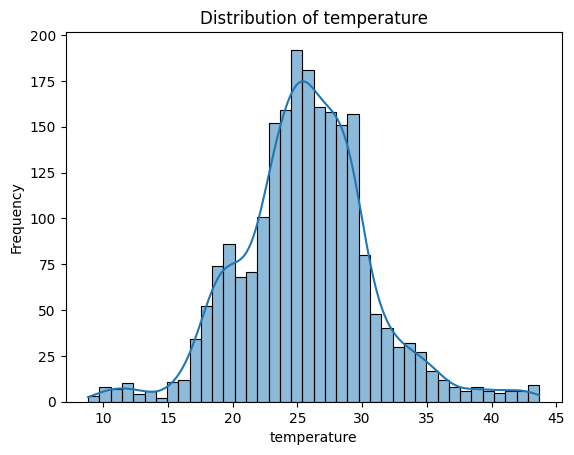

In [22]:
distribution_plot(crop, 'temperature')